# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
act17 = pd.read_csv('../data/act_2017.csv')
sat17 = pd.read_csv('../data/sat_2017.csv')
act18 = pd.read_csv('../data/act_2018.csv')
sat18 = pd.read_csv('../data/sat_2018.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
act17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The data shows a list of states and shows the average scores for each tested field in each corresponding test. It also shows what percentage of the school population participated in testing.

#### 4a. Does the data look complete? 

Answer: There may be more information available that wasn't included. Like size of testable population. But for the values measured there isn't any missing information. There is also a few errors.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [6]:
#code
act17.loc[act17['State']=='Maryland',['Science']] = 23.2
sat17.loc[sat17['State']=='Maryland',['Math']] = 520.0
act17.loc[act17['State']=='Wyoming',['Composite']] = 20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
#code
sat17.dtypes

State                                  object
Participation                          object
Evidence-Based Reading and Writing      int64
Math                                  float64
Total                                   int64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
#code
act17['Participation'] = [x.strip('%') for x in act17['Participation']]
act17['Participation'] = act17['Participation'].astype(float)
act17['Participation'] = act17['Participation'] * .01
act18['Participation'] = [x.strip('%') for x in act18['Participation']]
act18['Participation'] = act18['Participation'].astype(float)
act18['Participation'] = act18['Participation'] * .01
sat17['Participation'] = [x.strip('%') for x in sat17['Participation']]
sat17['Participation'] = sat17['Participation'].astype(float)
sat17['Participation'] = sat17['Participation'] * .01
sat18['Participation'] = [x.strip('%') for x in sat18['Participation']]
sat18['Participation'] = sat18['Participation'].astype(float)
sat18['Participation'] = sat18['Participation'] * .01

- Fix any individual values preventing other columns from being the appropriate type.

In [1]:
#code


- Finish your data modifications by making sure the columns are now typed appropriately.

In [11]:
#code
sat17.dtypes,sat18.dtypes,act17.dtypes,act18.dtypes

(State                                  object
 Participation                         float64
 Evidence-Based Reading and Writing      int64
 Math                                  float64
 Total                                   int64
 dtype: object, State                                  object
 Participation                         float64
 Evidence-Based Reading and Writing      int64
 Math                                    int64
 Total                                   int64
 dtype: object, State             object
 Participation    float64
 English          float64
 Math             float64
 Reading          float64
 Science          float64
 Composite         object
 dtype: object, State             object
 Participation    float64
 Composite        float64
 dtype: object)

- Display the data types again to confirm they are correct.

In [ ]:
#Code:

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [13]:
#code
sat17.rename(columns ={'Evidence-Based Reading and Writing':'read_write_sat17',
                       'Math':'math_sat17',
                       'Total':'total_sat17',
                       'Participation':'participation_sat17',
                       'State':'state17'},
             inplace=True)
sat18.rename(columns ={'Evidence-Based Reading and Writing':'read_write_sat18',
                       'Math':'math_sat18',
                       'Total':'total_sat18',
                       'Participation':'participation_sat18',
                       'State':'state18'},
             inplace=True)
act17.rename(columns ={'English':'english_act17',
                       'Math':'math_act17',
                       'Reading':'reading_act17',
                       'Participation':'participation_act17',
                       'Science':'science_act17',
                       'State':'state17',
                       'Composite':'composite_act17'},
             inplace=True)
act18.rename(columns ={'English':'english_act18',
                       'Math':'math_act18',
                       'Reading':'reading_act18',
                       'Participation':'participation_act18',
                       'Science':'science_act18',
                       'State':'state18',
                       'Composite':'composite_act18'},
             inplace=True)

sat17['read_write_sat17'] = sat17['read_write_sat17'].astype(float)
sat18['read_write_sat18'] = sat18['read_write_sat18'].astype(float)
sat17['math_sat17'] = sat17['math_sat17'].astype(float)
sat18['math_sat18'] = sat18['math_sat18'].astype(float)
sat17['total_sat17'] = sat17['total_sat17'].astype(float)
sat18['total_sat18'] = sat18['total_sat18'].astype(float)

act17['composite_act17'] = act17['composite_act17'].astype(float)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [17]:
#code
act18 = act18.drop(19)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [18]:
#Code:
satact18=pd.merge(act18,
        sat18,
        on='state18')
satact18
satact17=pd.merge(act17,
        sat17,
        on='state17')
satact17

,state17,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,read_write_sat17,math_sat17,total_sat17
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593.0,572.0,1165.0
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547.0,533.0,1080.0
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563.0,553.0,1116.0
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614.0,594.0,1208.0
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531.0,524.0,1055.0
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606.0,595.0,1201.0
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530.0,512.0,1041.0
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503.0,492.0,996.0
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482.0,468.0,950.0
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520.0,497.0,1017.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [19]:
#code
satact17.to_csv('combined_2017.csv')
satact18.to_csv('combined_2018.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [20]:
satact17.rename(columns = {'state17':'state'},
               inplace=True)
satact18.rename(columns = {'state18':'state'},
               inplace=True)
satactall = pd.merge(satact17,
                    satact18,
                    on='state')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [21]:
#Code:
satactall.describe()

,participation_act17,english_act17,math_act17,reading_act17,science_act17,composite_act17,participation_sat17,read_write_sat17,math_sat17,total_sat17,participation_act18,composite_act18,participation_sat18,read_write_sat18,math_sat18,total_sat18
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.659200,20.862000,21.13600,21.956000,21.410000,21.466000,0.386000,570.860000,558.580,1129.620000,0.623200,21.454000,0.448200,565.020000,557.760000,1122.880000
std,0.321107,2.324307,1.97399,2.046317,1.731962,2.004241,0.345602,44.385146,45.905,89.913085,0.341141,2.111312,0.370976,47.010416,46.987432,92.845634
min,0.080000,16.300000,18.00000,18.100000,18.200000,17.800000,0.020000,503.000000,492.000,996.000000,0.070000,17.700000,0.020000,480.000000,486.000000,998.000000
25%,0.310000,19.000000,19.40000,20.425000,19.925000,19.800000,0.040000,535.250000,523.250,1057.000000,0.277500,19.925000,0.042500,535.000000,524.250000,1062.250000
50%,0.710000,20.550000,20.90000,21.700000,21.300000,21.400000,0.340000,559.500000,549.500,1107.500000,0.660000,21.050000,0.500000,552.000000,545.500000,1098.500000
75%,1.000000,23.100000,23.00000,23.875000,22.975000,23.400000,0.650000,613.500000,601.000,1214.000000,1.000000,23.650000,0.745000,612.750000,594.250000,1207.000000
max,1.000000,25.500000,25.30000,26.000000,24.900000,25.500000,1.000000,644.000000,651.000,1295.000000,1.000000,25.600000,1.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [4]:
#code 

# pass

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [ ]:
#Code:

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?  Highest DE, MI, CT, NH, ME Lowest ND, MS, IO, MR, UT
    - 2018 SAT?  Highest CO, CT, DE, MI, ID Lowest ND, MS, IO, MR, UT
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [34]:
#code

highest_act17_participation = satactall.sort_values(by=['participation_act17'],ascending=False).head(10).state
highest_act18_participation = satactall.sort_values(by=['participation_act18'],ascending=False).head(10).state
lowest_act17_participation = satactall.sort_values(by=['participation_act17']).head(10).state
lowest_act18_participation = satactall.sort_values(by=['participation_act18']).head(10).state
highest_sat17_participation = satactall.sort_values(by=['participation_sat17'],ascending=False).head(10).state
highest_sat18_participation = satactall.sort_values(by=['participation_sat18'],ascending=False).head(10).state
lowest_sat17_participation = satactall.sort_values(by=['participation_sat17']).head(10).state
lowest_sat18_participation = satactall.sort_values(by=['participation_sat18']).head(10).state

highest_act17_comp = satactall.sort_values(by=['composite_act17'],ascending=False).head(10).state
highest_act18_comp = satactall.sort_values(by=['composite_act18'],ascending=False).head(10).state
lowest_act17_comp = satactall.sort_values(by=['composite_act17']).head(10).state
lowest_act18_comp = satactall.sort_values(by=['composite_act18']).head(10).state
highest_sat17_total = satactall.sort_values(by=['total_sat17'],ascending=False).head(10).state
highest_sat18_total = satactall.sort_values(by=['total_sat18'],ascending=False).head(10).state
lowest_sat17_total = satactall.sort_values(by=['total_sat17']).head(10).state
lowest_sat18_total = satactall.sort_values(by=['total_sat18']).head(10).state

print(f'The highest Participating ACT 2017 States are: {[item for item in highest_act17_participation]}')
print(' ')
print(f'The highest Participating ACT 2018 States are: {[item for item in highest_act18_participation]}')
print(' ')
print(f'The highest Participating SAT 2017 States are: {[item for item in highest_sat17_participation]}')
print(' ')
print(f'The highest Participating SAT 2018 States are: {[item for item in highest_sat18_participation]}')
print(' ')
print(f'The highest Scoring ACT 2017 States are: {[item for item in highest_act17_comp]}')
print(' ')
print(f'The highest Scoring ACT 2018 States are: {[item for item in highest_act18_comp]}')
print(' ')
print(f'The highest Scoring SAT 2017 States are: {[item for item in highest_sat17_total]}')
print(' ')
print(f'The highest Scoring SAT 2018 States are: {[item for item in highest_sat18_total]}')
print(' ')
print(f'The lowest Participating ACT 2017 States are: {[item for item in lowest_act17_participation]}')
print(' ')
print(f'The lowest Participating ACT 2018 States are: {[item for item in lowest_act18_participation]}')
print(' ')
print(f'The lowest Participating SAT 2017 States are: {[item for item in lowest_sat17_participation]}')
print(' ')
print(f'The lowest Participating SAT 2018 States are: {[item for item in lowest_sat18_participation]}')
print(' ')
print(f'The lowest Scoring ACT 2017 States are: {[item for item in lowest_act17_comp]}')
print(' ')
print(f'The lowest Scoring ACT 2018 States are: {[item for item in lowest_act18_comp]}')
print(' ')
print(f'The lowest Scoring SAT 2017 States are: {[item for item in lowest_sat17_total]}')
print(' ')
print(f'The lowest Scoring SAT 2018 States are: {[item for item in lowest_sat18_total]}')
print(' ')



#
#
#
#
#
#
# This is where I left off. Everything should be executable in order from this point

The highest Participating ACT 2017 States are: ['Alabama', 'Kentucky', 'Wisconsin', 'Utah', 'Tennessee', 'South Carolina', 'Oklahoma', 'North Carolina', 'Nevada', 'Missouri']
 
The highest Participating ACT 2018 States are: ['Alabama', 'Kentucky', 'Wisconsin', 'Utah', 'Tennessee', 'South Carolina', 'Oklahoma', 'Ohio', 'North Carolina', 'Nevada']
 
The highest Participating SAT 2017 States are: ['Michigan', 'Connecticut', 'Delaware', 'New Hampshire', 'Maine', 'Idaho', 'Florida', 'Massachusetts', 'Rhode Island', 'New Jersey']
 
The highest Participating SAT 2018 States are: ['Colorado', 'Connecticut', 'Delaware', 'Michigan', 'Idaho', 'Maine', 'Illinois', 'Rhode Island', 'New Hampshire', 'New Jersey']
 
The highest Scoring ACT 2017 States are: ['New Hampshire', 'Massachusetts', 'Connecticut', 'Maine', 'New York', 'Delaware', 'Michigan', 'Rhode Island', 'New Jersey', 'Virginia']
 
The highest Scoring ACT 2018 States are: ['Connecticut', 'Massachusetts', 'New Hampshire', 'New York', 'Michig

## Comments on Data:

For the most part States do not seem to switch between which test they prefer to administer. The States that have lower participation scores for a given test tend to have higher scores. 


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

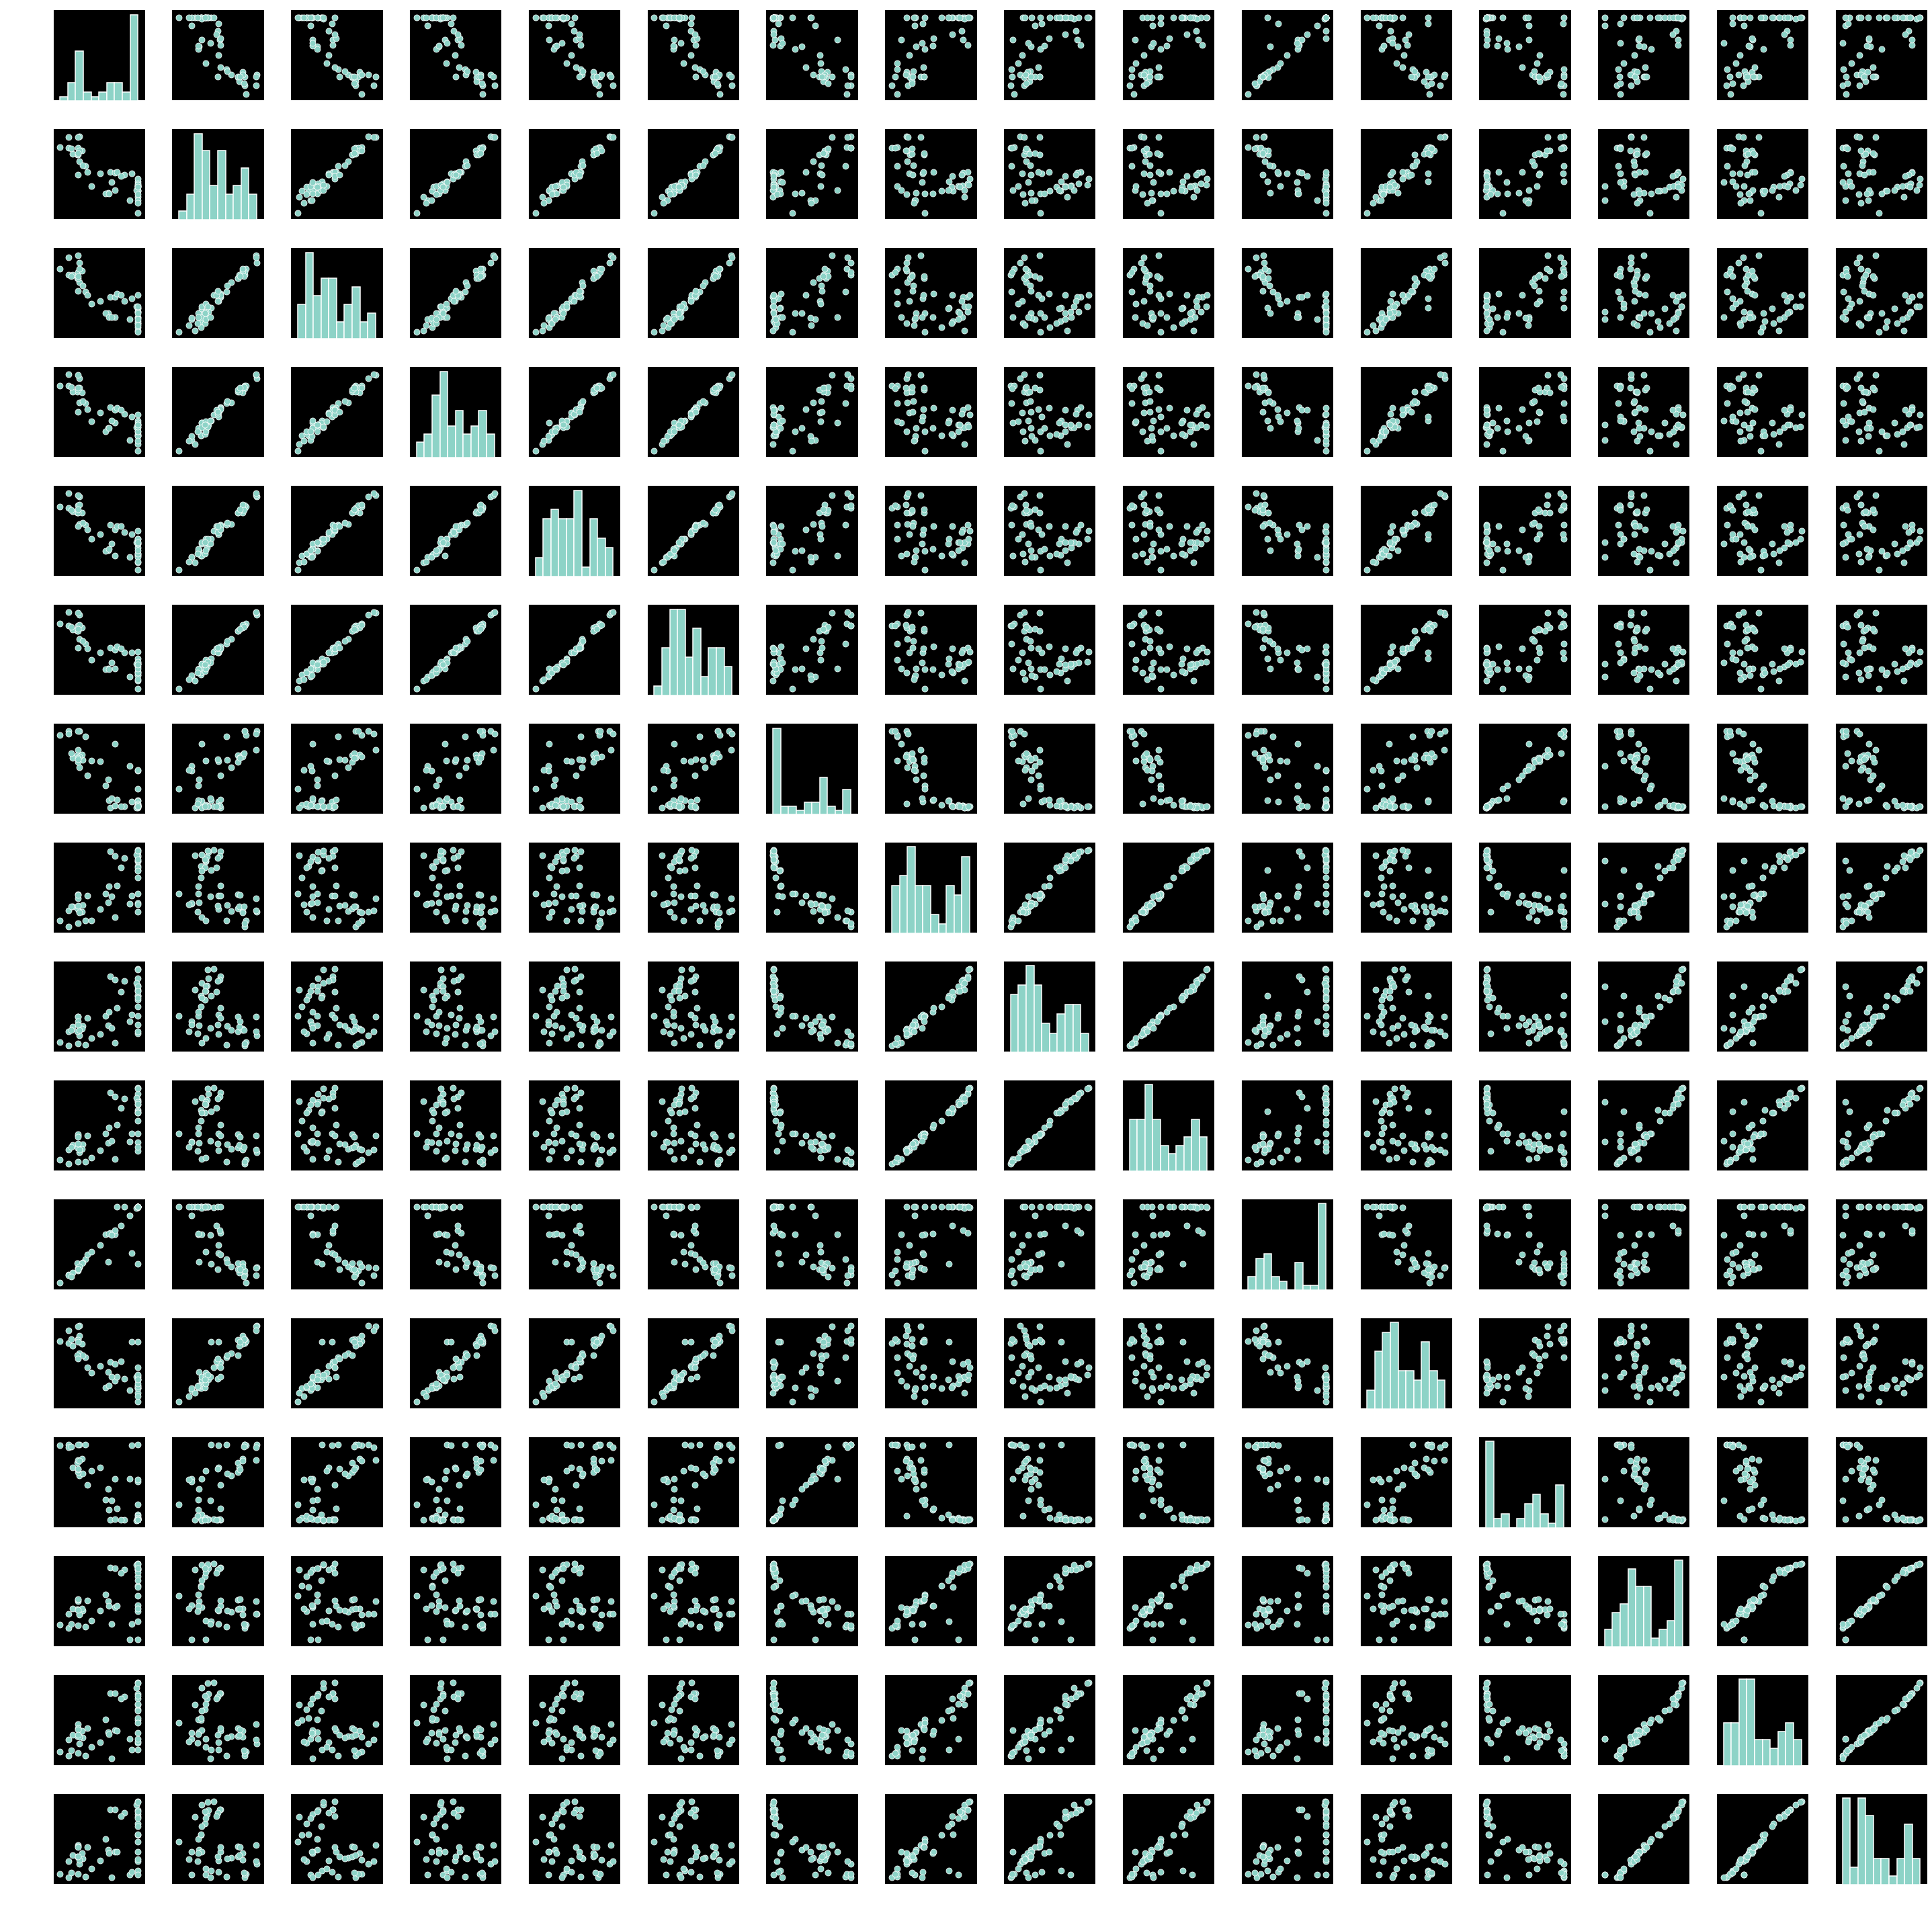

In [35]:
sns.pairplot(satactall)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [ ]:
# Code

# Done above

# No obvious signs of Normal Distirbution. Sample size is likely too small. A global database 
# of all individuals scores would be more apt for this analysis.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [ ]:
# Code

# Done Above



# Correlations in Data:

The strongest correlations are between scores of individual tests. A state that scored highly on one category of a test tended to score highly on all of them. With a nearly 1:1 observance on Math and Science. However, this trend isn't useful to the questions we have on this data. The strongest correlations in the data that are beneficial to our question are between same year opposite test participation and score. I will post below the charts that best show this correlation.

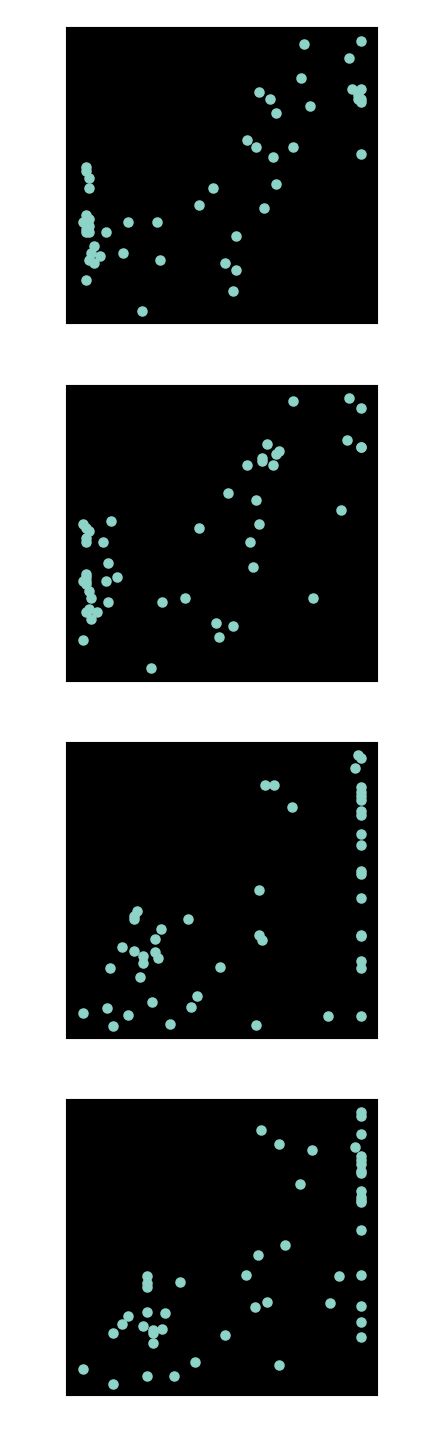

In [39]:
plt.figure(figsize = (6,20))

ax1 = plt.subplot(4,1,1)
ax1.set_title('SAT Participation vs. Composite ACT scores for 2018')
ax1.scatter(satactall['participation_sat18'],
           satactall['composite_act18'])
ax1 = plt.subplot(4,1,2)
ax1.set_title('SAT Participation vs. Composite ACT scores for 2018')
ax1.scatter(satactall['participation_sat17'],
           satactall['composite_act17'])
ax1 = plt.subplot(4,1,3)
ax1.set_title('SAT Participation vs. Composite ACT scores for 2018')
ax1.scatter(satactall['participation_act18'],
           satactall['total_sat18'])
ax1 = plt.subplot(4,1,4)
ax1.set_title('SAT Participation vs. Composite ACT scores for 2018')
ax1.scatter(satactall['participation_act17'],
           satactall['total_sat17'])
plt.tight_layout();

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [47]:
# Code
satactall.to_csv('completesactact.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/completesactact.csv'

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [43]:
# Cross-participation seems to boost overall scores. It would be very difficult to convince a student who is performing poorly
# to take a test. I imagine the main causes between scores discrepencies come from academic funding and focus. 

# Many states have 100% Participation which is likely due to mandatory testing. The states with high rates are likely due to tests
# being given in place of class. States with low participation rates could be due to students being made to pay for tests. This
# would likely explain why they tend to have higher scores as well. State incentives to increase testing would boost overall 
# participation rate. Making a score (even a low one) mandatory for any college application would likely increase participation
# as well. 

# In order to increase participation and scores scholarships or tuition credits could be awarded to students who participate. 
# Possibly small credits given to students who perfom adequately. Possibly on a competitively achievable percentile grouping. 
# these could be awarded to the college as tax credits and therefore wouldn't necesarily cost the state or college too much. 



## Bonus: Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code: